In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import stats_support as stats

sns.set_theme()

Prepare data

In [4]:

recovered_old = stats.readData("benchmark-stats-2025-04-09-amb-pruning-rascal-0-10240.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-19-parent-amb-3-rascal-0-10240.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-23-parent-amb-2-rascal-0-10240.txt.gz")
#recovered = stats.readData("benchmark-stats-2025-04-23-parent-amb-any-3-rascal-0-10240.txt.gz")

# Read data at different pruning levels
recovered = []
for pruneLevel in range(5):
    recovered.append(stats.readData("benchmark-stats-2025-04-29-flattener-amb-filter-rascal-0-10240maxamb-" + str(pruneLevel) + ".txt.gz"))

### Visualize the recovery duration per file size bucket using a violing graph.

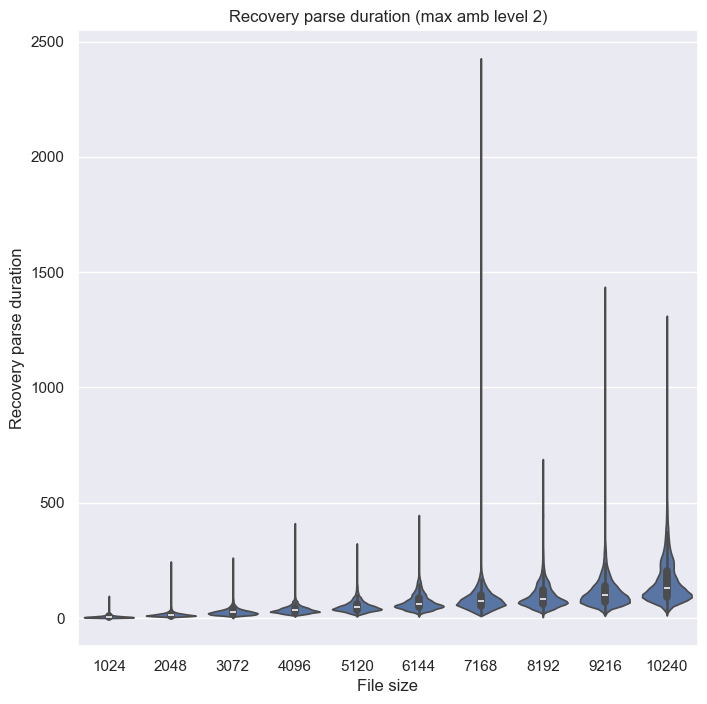

In [ ]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
#ax1.set_yscale('symlog')

sns.violinplot(
    data=recovered[2],
    x="bsize", y="duration",
    density_norm="width",
    ax = ax1
)

ax1.set_title("Recovery parse duration (max amb level 2)")

ax1.set_xlabel("File size")
ax1.set_ylabel("Recovery parse duration")


plt.show(fig1)

### Node distribution per file size

TypeError: 'Axes' object is not subscriptable

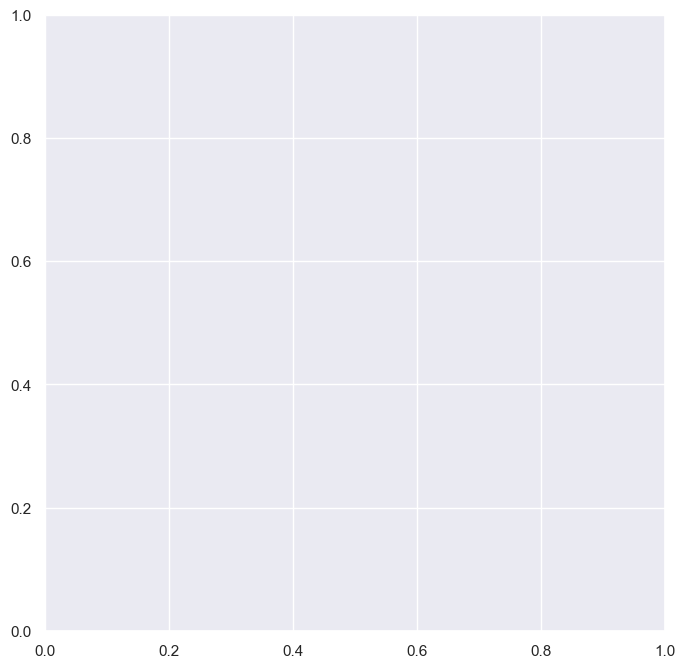

In [ ]:
fig2, ax2 = plt.subplots(figsize=(8, 8), sharey=True)
ax2.set_yscale('symlog')
 
sns.violinplot(
    data=recovered[2],
    x="bsize", y="nodes",
    density_norm="width",
    ax=ax2
)

ax1.set_title("Parse forest node counts (max amb level 2)")
ax2.set_xlabel("File size")
ax2.set_ylabel("Node count (unshared)")

plt.show(fig2)

### Max node counts per amb pruning level

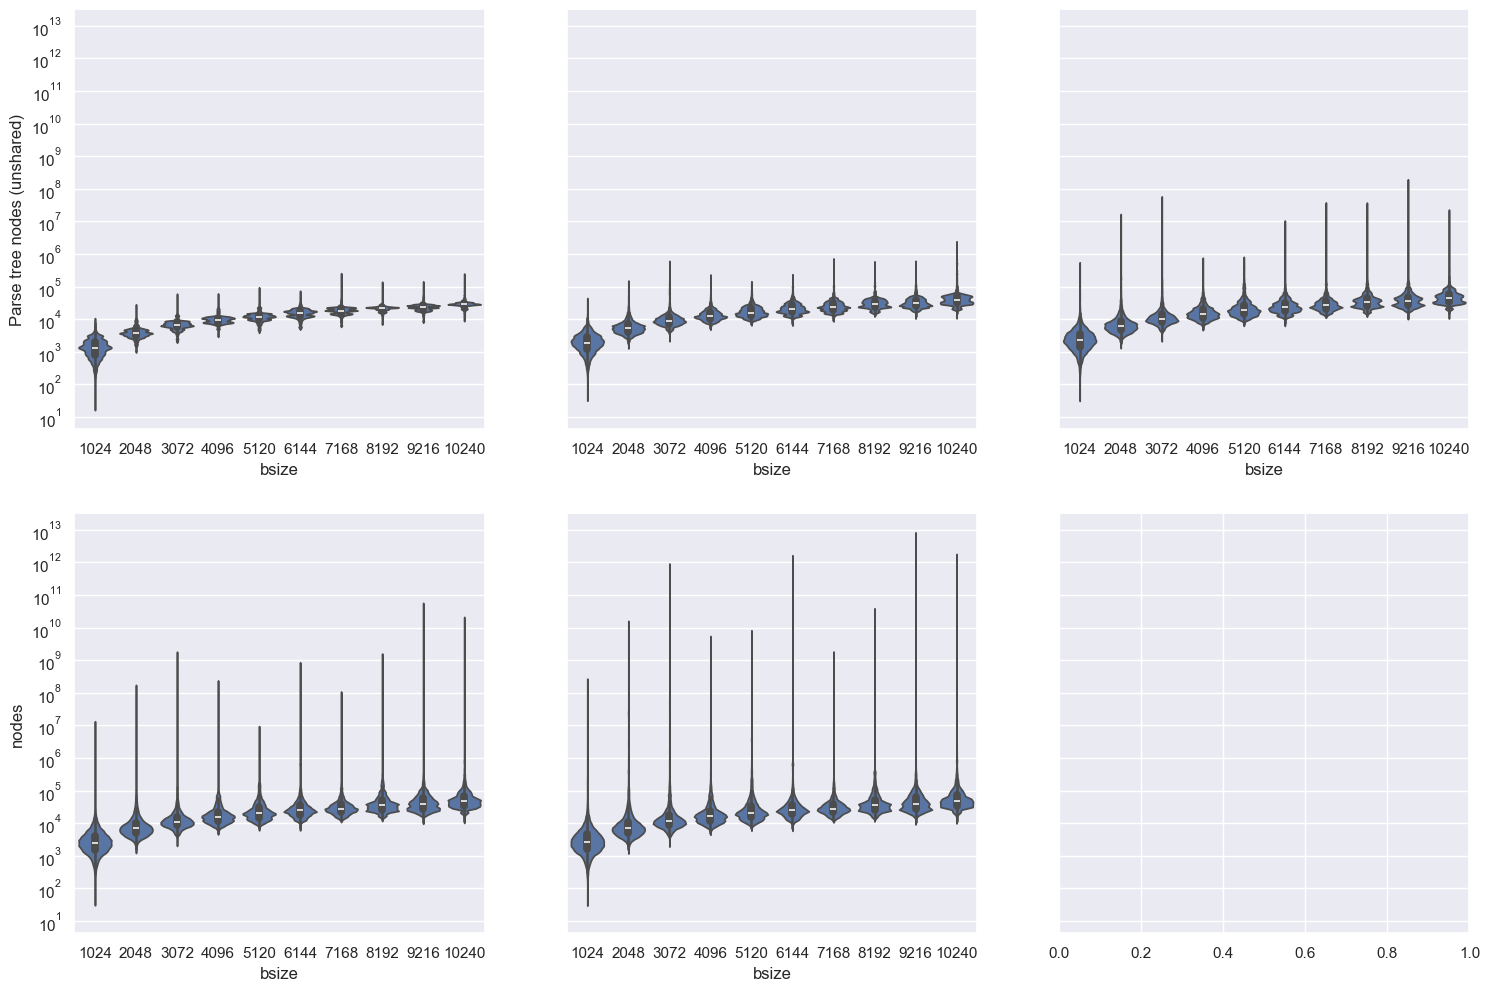

In [9]:
pruneFig, pruneAx = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
pruneAx[0][0].set_yscale('symlog')
pruneAx[0][0].set_ylabel("Parse tree nodes (unshared)")

for pruneLevel in range(5):
    sns.violinplot(
        data=recovered[pruneLevel],
        x="bsize", y="nodes",
        density_norm="width",
        ax=pruneAx[pruneLevel // 3][pruneLevel % 3]
    )

plt.show(pruneFig)


### Parse ratio vs file size

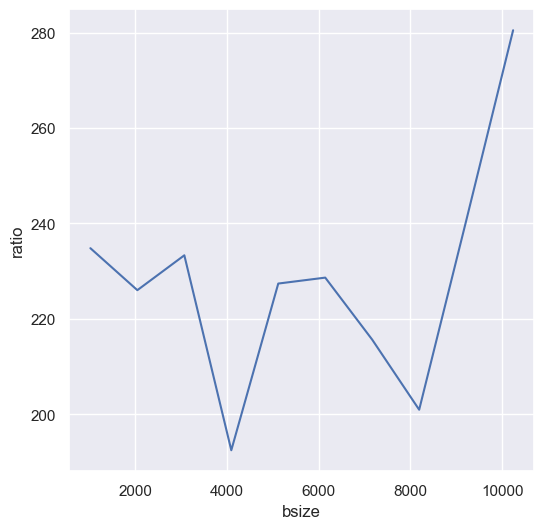

In [ ]:
ratioFig, ratioAx = plt.subplots(figsize=(6, 6))
grouped = recovered.groupby("bsize", observed=True).agg({"ratio": "mean", "nodes": "mean"}).reset_index()
sns.lineplot(data=grouped, x="bsize", y="ratio", ax=ratioAx)
plt.show(ratioFig)


